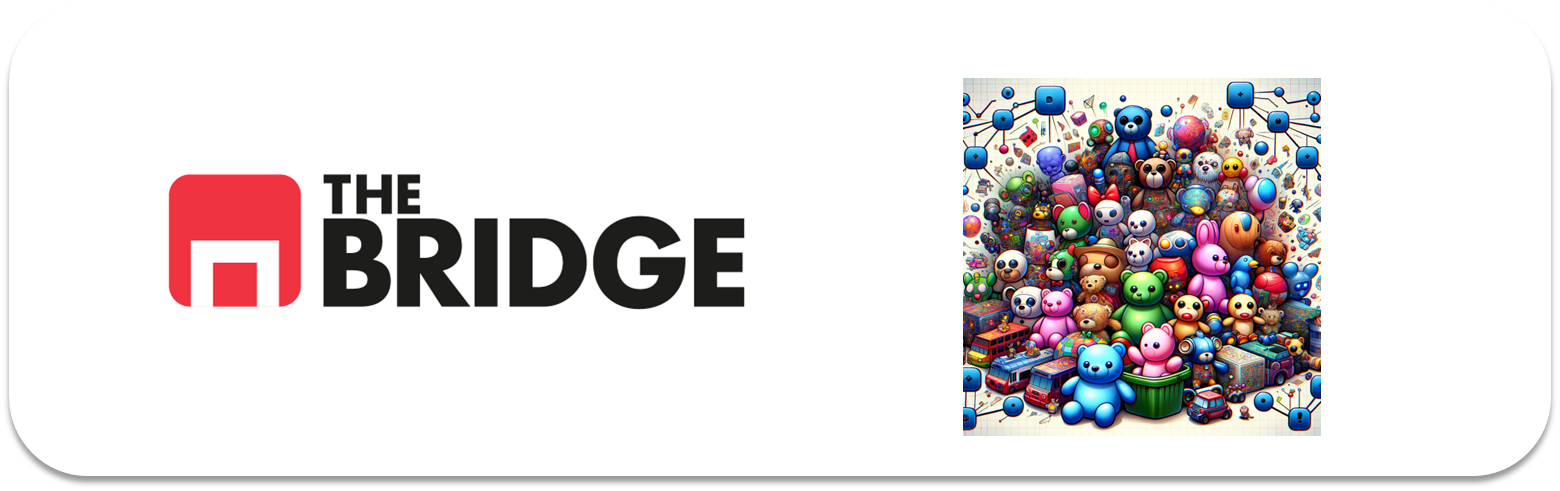

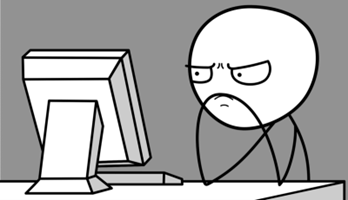

Para ejercitarte y afianzar lo aprendido sobre **Clustering Jerárquico**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Descripción del "Problema"

Existen disponibles datos de encuestas y cuestionarios a 26 instituciones. Estas instituciones han sido evaluadas bajo distintos criterios de desempeño, como profesorado, costos, ubicación, becas e infraestructura. Cada criterio va del 1 al 5, siendo 5 el mayor.

El objetivo principal será segmentar las instituciones en grupos basásndonos en los criterios antes mencionados, y luego generar descripciones y recomendaciones a seguir con respecto a cada uno de los grupos identificados. Las recomendaciones pueden ser para distintos clientes.
    </div>

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import numpy as np

#pintar
import matplotlib.pyplot as plt
import seaborn as sns

### Ejercicio 1

Carga los datos ("Engg_College_Data") y haz una primera inspección "rápida".

In [2]:
data = pd.read_csv('./data/Engg_College_Data.csv')
data

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3
2,3,C,4,5,5,4,5
3,4,D,5,4,5,4,4
4,5,E,2,5,2,2,5
5,6,F,3,4,3,3,4
6,7,G,1,3,1,1,2
7,8,H,4,4,5,5,5
8,9,I,4,4,4,4,4
9,10,J,3,4,3,4,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SR_NO           26 non-null     int64 
 1   Engg_College    26 non-null     object
 2   Teaching        26 non-null     int64 
 3   Fees            26 non-null     int64 
 4   Placements      26 non-null     int64 
 5   Internship      26 non-null     int64 
 6   Infrastructure  26 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.6+ KB


In [4]:
data.describe()

,SR_NO,Teaching,Fees,Placements,Internship,Infrastructure
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,13.500000,2.807692,3.576923,2.884615,2.769231,3.384615
std,7.648529,1.132051,1.331858,1.531716,1.242826,1.298520
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.250000,2.000000,2.250000,1.250000,2.000000,3.000000
50%,13.500000,3.000000,4.000000,3.000000,2.000000,3.000000
75%,19.750000,3.000000,5.000000,4.000000,4.000000,4.750000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Ejercicio 2

Crea un train_set con una única variable de tipo índice (que nos servirá para identifcar a las instituciones en cada clúster)

In [9]:
train_set = data['Engg_College']
train_set

0     A
1     B
2     C
3     D
4     E
5     F
6     G
7     H
8     I
9     J
10    K
11    L
12    M
13    N
14    O
15    P
16    Q
17    R
18    S
19    T
20    U
21    V
22    W
23    X
24    Y
25    Z
Name: Engg_College, dtype: object

### Ejercicio 3

Determina el tipo de cada variable, haciendo un univariante de las mismas.

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

<Figure size 1000x1200 with 0 Axes>

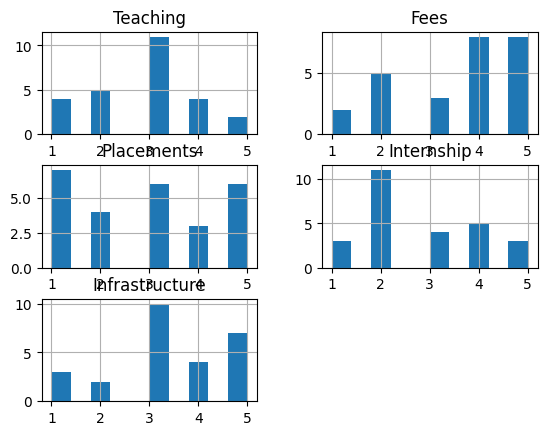

In [6]:
features = ['Teaching','Fees','Placements','Internship','Infrastructure']

plt.figure(figsize=(10,12))
data[features].hist()
plt.tight_layout


### Ejercicio 4

Es hora de hacer el miniEDA. Fíjate que en este caso no tenemos contínuas numéricas que nos permitan ver claramente una clusterización con scatter plots. Compruébalo haciendo un pairplot del dataset.

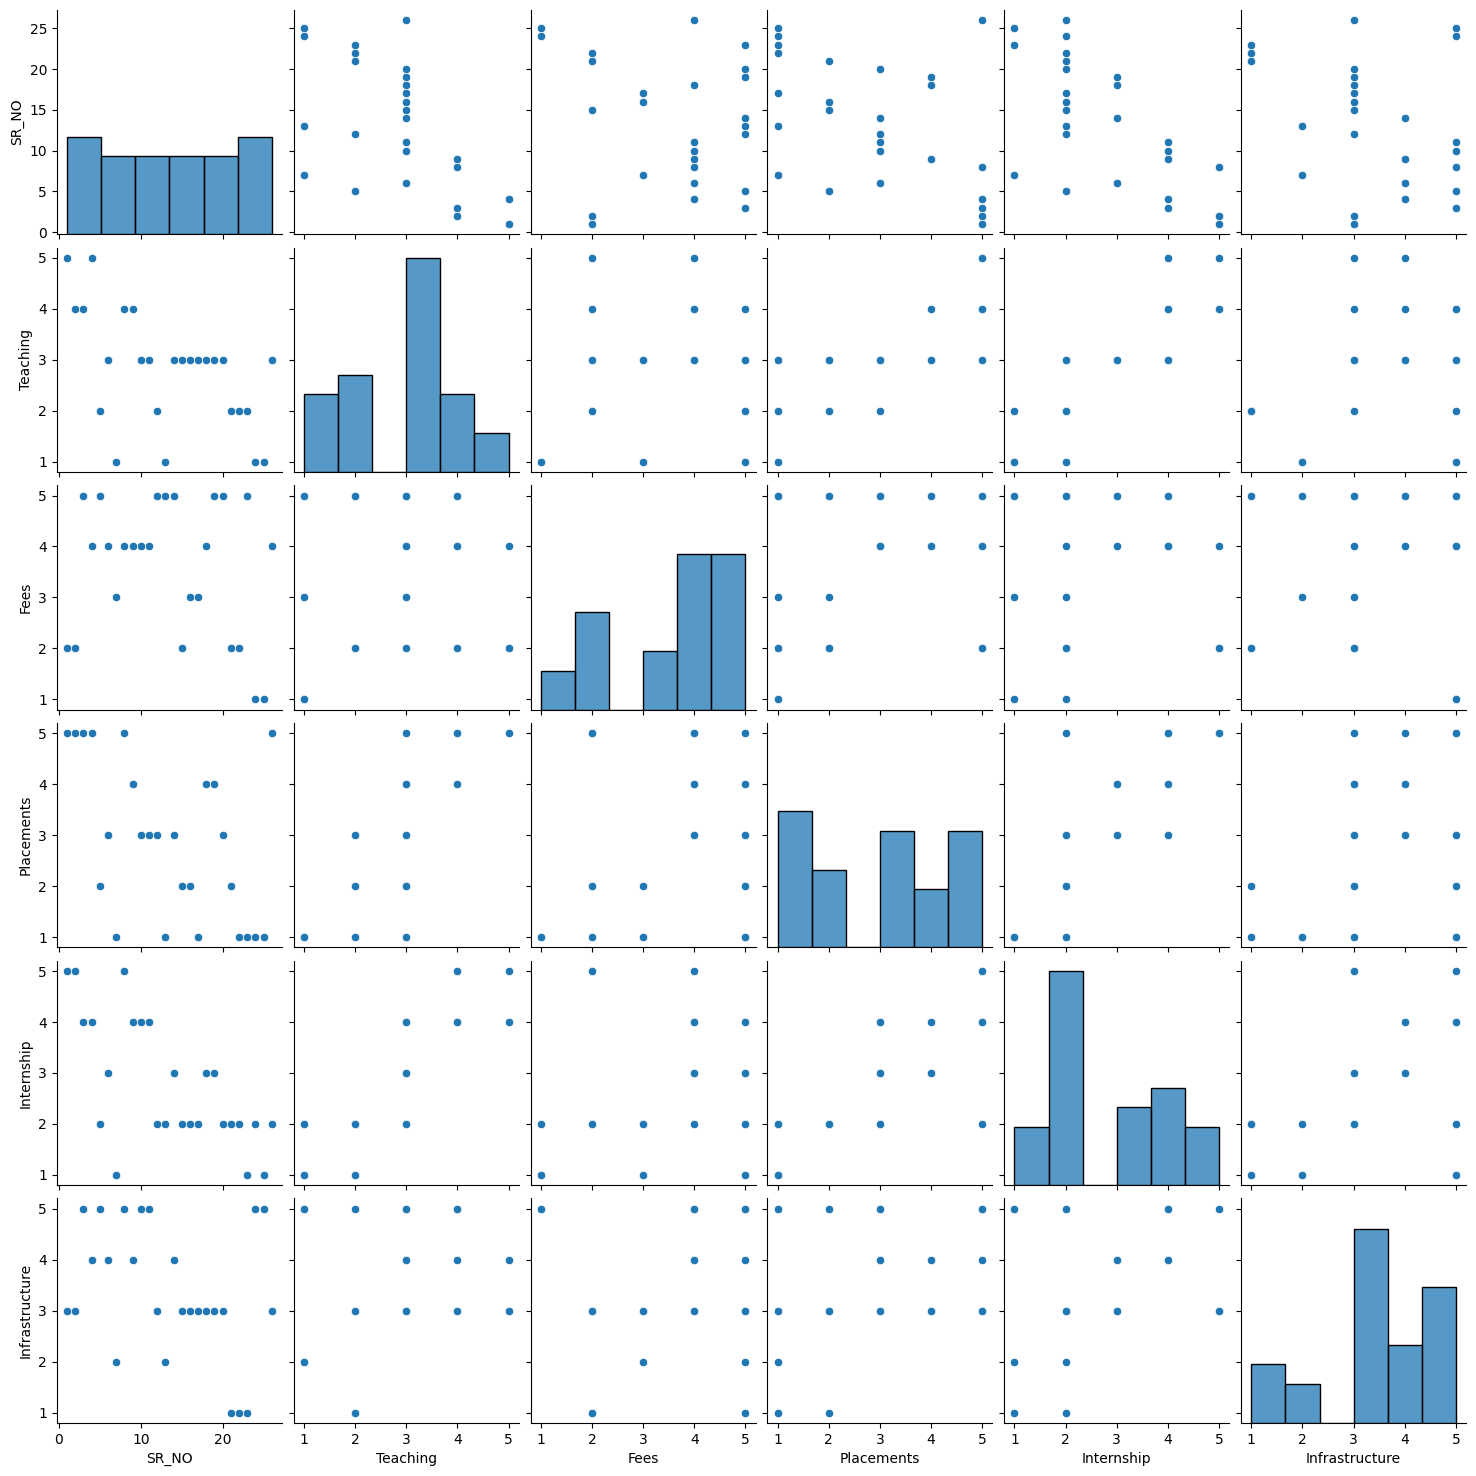

In [7]:
sns.pairplot(data)

### Ejercicio 5

Podríamos intentar cualquier tipo de clusterización, pero vamos a emplear una clusterización jerárquica porque sea cual sea la agrupación si que nos interesa establecer una jerarquía o una relación de distancia entre las diferentes instituciones (es algo que nos dicen desde el cliente, o sea "Negocio")

Elegido el tipo de clustering, tenemos que determinar los hiperparámetros. En este caso, el número de clusteres. Para ello nos vamos a apoyar en el dendrograma. Construye el dendrograma utilizando "average" como el método de ligado o linkage.



NOTA: no lo hemos hecho, ni dicho, pero nos quedaremos con todas las variables para sean features y como están en la misma escala no hay que procesarlas otra vez.

In [8]:
data

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3
2,3,C,4,5,5,4,5
3,4,D,5,4,5,4,4
4,5,E,2,5,2,2,5
5,6,F,3,4,3,3,4
6,7,G,1,3,1,1,2
7,8,H,4,4,5,5,5
8,9,I,4,4,4,4,4
9,10,J,3,4,3,4,5


In [11]:
from sklearn.cluster import AgglomerativeClustering

selected_data = data[['Teaching','Fees','Placements','Internship','Infrastructure']]

clustering_model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='average')
clustering_model.fit(selected_data)

AgglomerativeClustering(linkage='average', n_clusters=5)

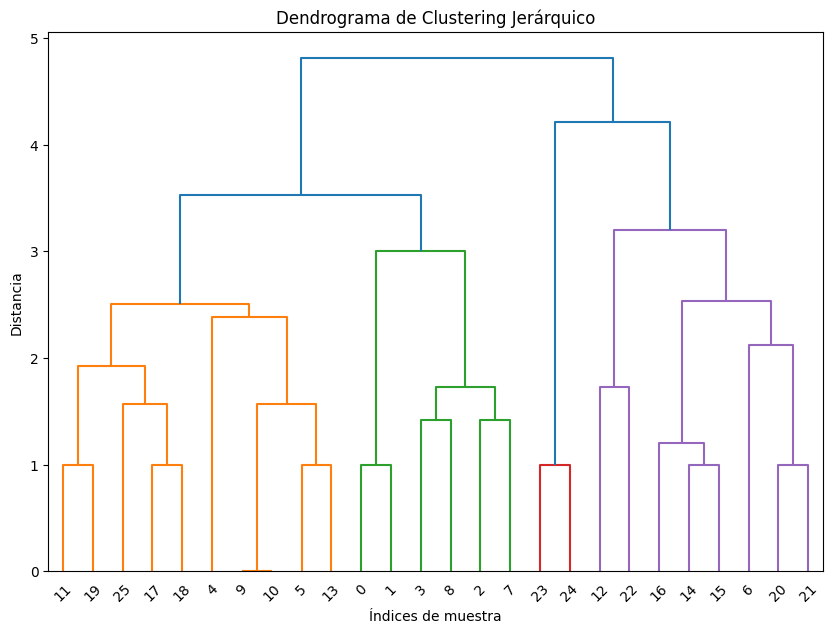

In [12]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Generamos el linkage matrix a partir de los datos seleccionados
linked = shc.linkage(selected_data, method='average', metric='euclidean')

# Dibujamos el dendrograma
plt.figure(figsize=(10, 7))
shc.dendrogram(linked)
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Índices de muestra")
plt.ylabel("Distancia")
plt.show()

### Ejercicio 6

Utilizando el método del máximo salto horizontal o método del máximo gap, ¿dónde colocarías la recta de corte? Vuelve a dibujar el dendrograma superponiendo esa línea. Decide el número de clusteres.

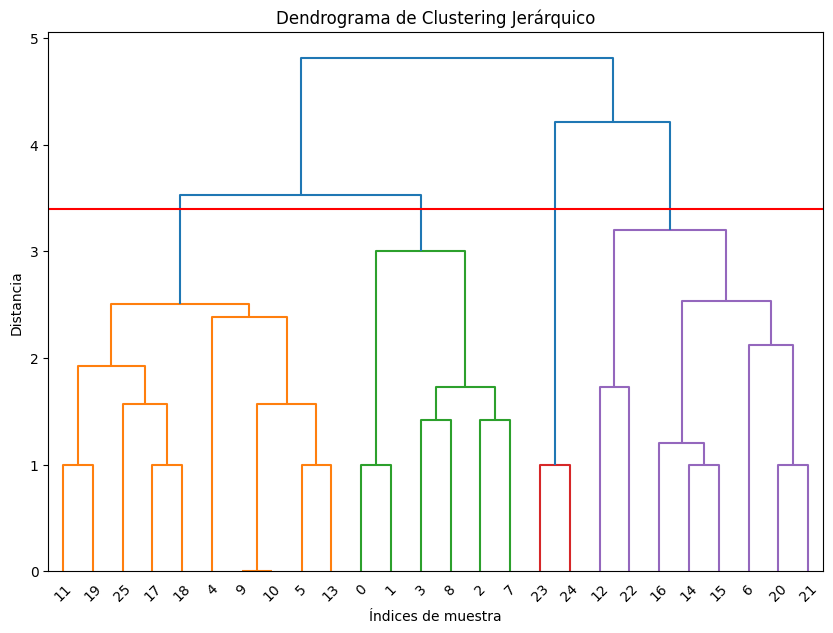

In [19]:
# Dibujamos el dendrograma
plt.figure(figsize=(10, 7))
shc.dendrogram(linked)
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Índices de muestra")
plt.ylabel("Distancia")
plt.axhline(y = 3.4, color = 'r', linestyle = '-')

### Ejercicio 7

Utilizando el codigo siguiente, emplea el número de clústeres obtenidos en el ejercicio anterior (usa 4 si no has logrado obtener un número que te convenza) y muestra cuántas instituciones hay por cluster. ¿Qué te llama la atención?

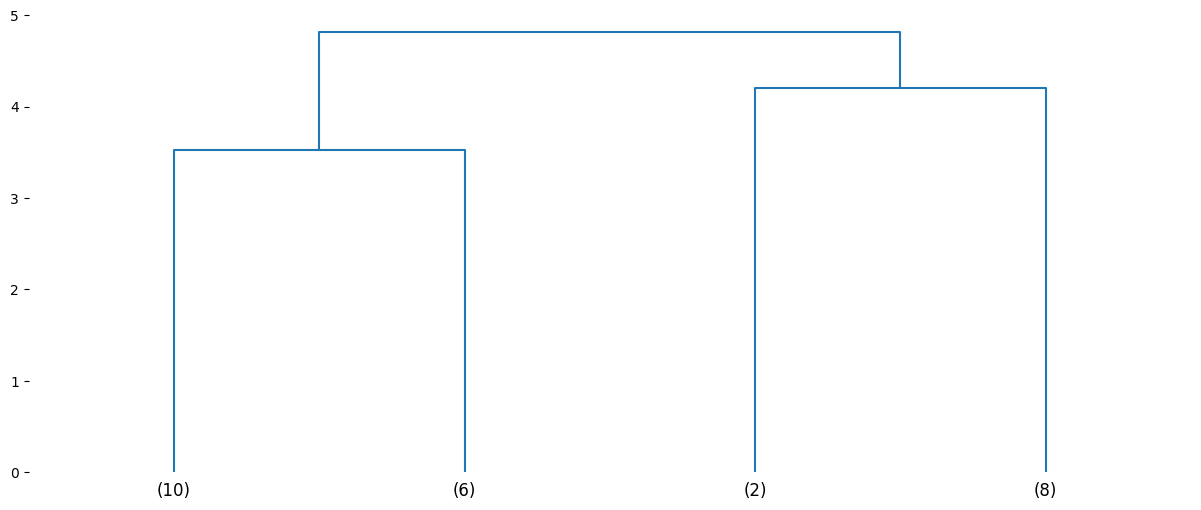

In [23]:
#Miramos cuantos elementos hay en cada cluster

labelList = train_set.astype(str).tolist()

plt.figure(figsize =(15,6))
dend = shc.dendrogram(linked,
                 truncate_mode='lastp',
                 p = 4, # nº clústers
                 labels = labelList 
                 )
sns.despine(left=True, bottom=True)

### Ejercicio 8

Previo a analizar las características específicas de cada clúster, analiza el clúster con menor número de elementos, es decir muestra las características de sus elementos constituyentes

In [25]:
# Crear los 4 clusters
clusters = shc.fcluster(linked, t=4, criterion='maxclust')

# Determina el número de elementos en cada clúster
unique, counts = np.unique(clusters, return_counts=True)

# Encuentra el clúster con el menor número de elementos
smallest_cluster_label = unique[np.argmin(counts)]
smallest_cluster_size = np.min(counts)

# Muestra el número de elementos en ese clúster
print(f"El clúster con el menor número de elementos tiene {smallest_cluster_size} elementos.")
print(f"Las observaciones en este clúster corresponden al clúster número {smallest_cluster_label}.")

# Extraer las filas del DataFrame que pertenecen a ese clúster
smallest_cluster_elements = data[clusters == smallest_cluster_label]

# Mostrar las características de esos elementos
print("Características de las observaciones en el clúster más pequeño:")

smallest_cluster_elements[['Teaching', 'Fees', 'Placements', 'Internship', 'Infrastructure']].head()

El clúster con el menor número de elementos tiene 2 elementos.
Las observaciones en este clúster corresponden al clúster número 3.
Características de las observaciones en el clúster más pequeño:


,Teaching,Fees,Placements,Internship,Infrastructure
23,1,1,1,2,5
24,1,1,1,1,5


### Ejercicio 9

Nos hemos adelantado en el ejercicio anterior. Es hora de construir el clustering tal como hemos visto en el workout, utiliza el "AgglomerativeClustering" de sklearn para hacer el agrupamiento con el número de clusteres elegido y asigna las etiquetas a cada instancia. (Recuerda que hemos usado el linkage a "average", no a "ward" como se suele emplear)

In [26]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='average')

# Entrenamos el modelo y asignamos las etiquetas de clústeres a las observaciones
labels = clustering_model.fit_predict(selected_data)

# Asignamos las etiquetas de clúster a cada instancia en el DataFrame original
data['Cluster_Label'] = labels

data


,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,Cluster_Label
0,1,A,5,2,5,5,3,1
1,2,B,4,2,5,5,3,1
2,3,C,4,5,5,4,5,1
3,4,D,5,4,5,4,4,1
4,5,E,2,5,2,2,5,3
5,6,F,3,4,3,3,4,3
6,7,G,1,3,1,1,2,0
7,8,H,4,4,5,5,5,1
8,9,I,4,4,4,4,4,1
9,10,J,3,4,3,4,5,3


### Ejercicio 10

Comprueba que las instancias asignadas al clúster con 2 instancias son las entidades "X" e "Y"

In [30]:
# Contamos cuántas instancias hay en cada clúster
cluster_counts = data['Cluster_Label'].value_counts()

# Identificamos el clúster con 2 instancias
cluster_with_2 = cluster_counts[cluster_counts == 2].index[0]
cluster_with_2


2

In [32]:
# Extraemos las instancias que pertenecen al clúster con 2 elementos
instances_in_cluster_2 = data[data['Cluster_Label'] == cluster_with_2]

# Mostrar las instancias que pertenecen al clúster con 2 elementos
print("Instancias asignadas al clúster con 2 elementos:")
print(instances_in_cluster_2)


Instancias asignadas al clúster con 2 elementos:
    SR_NO Engg_College  Teaching  Fees  Placements  Internship  \
23     24            X         1     1           1           2   
24     25            Y         1     1           1           1   

    Infrastructure  Cluster_Label  
23               5              2  
24               5              2  


In [33]:
# Comprobar si las instancias "X" e "Y" están en ese clúster
# Asegúrate de que 'X' y 'Y' sean los valores que deseas verificar en tu DataFrame
x_y_instances = instances_in_cluster_2[instances_in_cluster_2['Engg_College'].isin(['X', 'Y'])]

# Mostrar si 'X' e 'Y' están en el clúster con 2 instancias
print("\nEntidades 'X' e 'Y' asignadas al clúster con 2 elementos:")
print(x_y_instances)


Entidades 'X' e 'Y' asignadas al clúster con 2 elementos:
    SR_NO Engg_College  Teaching  Fees  Placements  Internship  \
23     24            X         1     1           1           2   
24     25            Y         1     1           1           1   

    Infrastructure  Cluster_Label  
23               5              2  
24               5              2  


### Ejercicio 11

Igual que podemos intuir que el cluster "pequeño" es el de las instituiciones peor puntuadas, muestra los valores medios de las features para cada clúster y da tu interpretación de que es cada uno. Emplea un gráfico comparativo.


In [34]:
# Calcular los valores medios de las características para cada clúster
cluster_means = data.groupby('Cluster_Label')[['Teaching', 'Fees', 'Placements', 'Internship', 'Infrastructure']].mean()

# Mostrar los valores medios
cluster_means

,Teaching,Fees,Placements,Internship,Infrastructure
Cluster_Label,,,,,
0,2.125000,3.125,1.375000,1.75,2.0
1,4.333333,3.500,4.833333,4.50,4.0
2,1.000000,1.000,1.000000,1.50,5.0
3,2.800000,4.500,3.300000,2.80,3.8


<Figure size 1000x600 with 0 Axes>

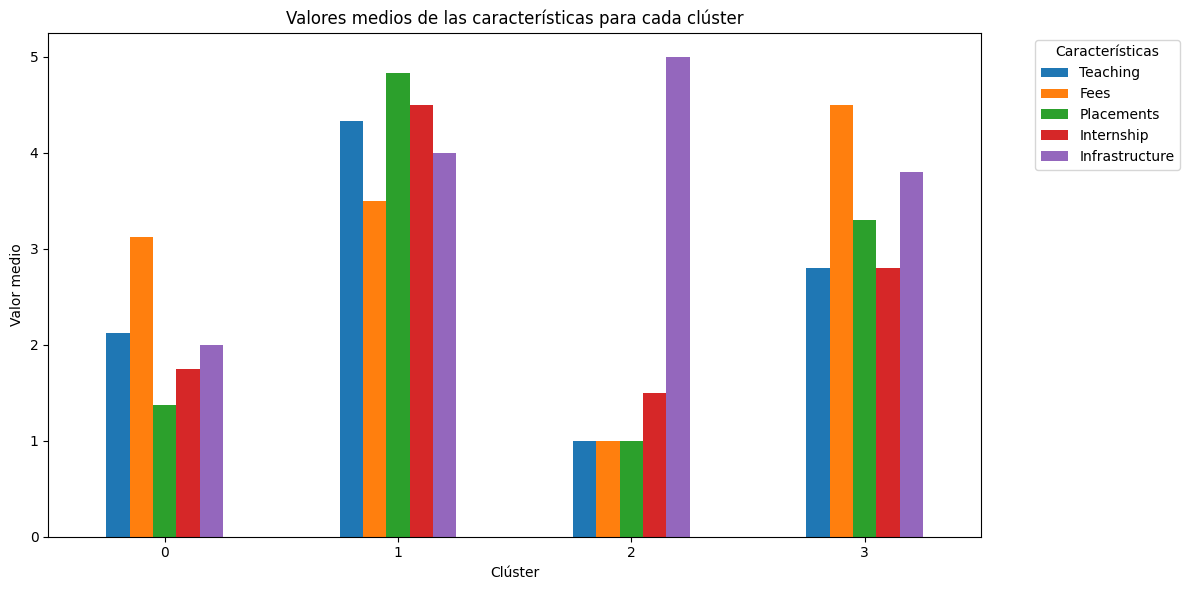

In [35]:
# Gráfico comparativo (utilizando un gráfico de barras)
plt.figure(figsize=(10, 6))
cluster_means.plot(kind='bar', figsize=(12, 6))
plt.title("Valores medios de las características para cada clúster")
plt.xlabel("Clúster")
plt.ylabel("Valor medio")
plt.xticks(rotation=0)
plt.legend(title='Características', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Ejercicio 12

Para finalizar, ¿qué recomendaciones darías a diferentes clientes en base a los patrones encontrados?